In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Preprocessing

In [2]:
#this function takes the text from the csv and preprocesses it 
#(changes to lower case, sent tokenzies, word tokenizes,
#removes unnecessary characters, lemmatizes, and puts it in a dataframe)
#help for this function was used from https://git.generalassemb.ly/dsi-911/504-lesson-nlp-i/blob/master/solution-code/solution-code.ipynb

def preprocessing(dataframe, title_text_col):
    lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer('\w+')
    text = dataframe[title_text_col]
    
    lemmatized_data = []
    
    df_text = [sent_tokenize(t) for t in text]
    
    for sentences in df_text:
        sentence = []
        for s in sentences:
            words = tokenizer.tokenize(s)
            words_lemmatized = [lemmatizer.lemmatize(word.lower()) for word in words]
            sentences_lemmatized = ' '.join(words_lemmatized)
            sentence.append(sentences_lemmatized)  
        lemmatized_data.append(sentence)
    
    df_lemm = [' '.join(s) for s in lemmatized_data]
    new_df = pd.DataFrame({'title_text': df_lemm, 'subreddit': dataframe['subreddit']})
    return new_df

# Fitness

In [3]:
#reading in the fitness csv and dropping the self_text column because it is empty
fitness = pd.read_csv('./data/fitness.csv')
fitness.drop(['self_text'], axis=1, inplace=True)
fitness.head()

,created_utc,title,subreddit,title_text
0,2023-10-19 09:00:43,"Daily Simple Questions Thread - October 19, 2023",Fitness,"Daily Simple Questions Thread - October 19, 20..."
1,2023-10-18 09:00:22,Rant Wednesday,Fitness,Rant Wednesday-Welcome to Rant Wednesday: It’s...
2,2023-10-18 09:00:18,"Daily Simple Questions Thread - October 18, 2023",Fitness,"Daily Simple Questions Thread - October 18, 20..."
3,2023-10-17 09:00:48,"Daily Simple Questions Thread - October 17, 2023",Fitness,"Daily Simple Questions Thread - October 17, 20..."
4,2023-10-16 07:02:00,Moronic Monday - Your weekly stupid questions ...,Fitness,Moronic Monday - Your weekly stupid questions ...


In [4]:
preprocessing(fitness, 'title_text')

,title_text,subreddit
0,daily simple question thread october 19 2023 w...,Fitness
1,rant wednesday welcome to rant wednesday it s ...,Fitness
2,daily simple question thread october 18 2023 w...,Fitness
3,daily simple question thread october 17 2023 w...,Fitness
4,moronic monday your weekly stupid question thr...,Fitness
...,...,...
962,daily simple question thread july 09 2022 welc...,Fitness
963,gym story saturday hi welcome to your weekly t...,Fitness
964,physique phriday welcome to the physique phrid...,Fitness
965,daily simple question thread july 08 2022 welc...,Fitness


In [5]:
X = fitness['title_text']
y = fitness['subreddit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### CountVectorizer

In [7]:
cvec = CountVectorizer(stop_words='english')

In [8]:
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [9]:
X_train = cvec.transform(X_train)

In [10]:
X_test = cvec.transform(X_test)

In [11]:
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names_out())

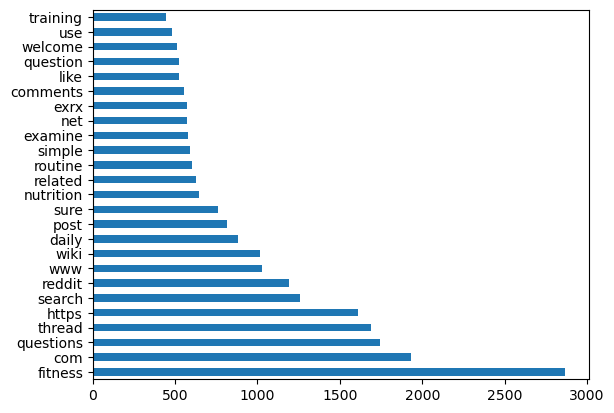

In [12]:
#help for this graph was used from https://git.generalassemb.ly/dsi-911/505-lesson-nlp-ii/blob/main/solution-code/katie-solution-code.ipynb
X_train_df.sum().sort_values(ascending=False).head(25).plot(kind='barh');

# Nutrition

In [13]:
#reading in the nutrition csv
nutrition = pd.read_csv('./data/nutrition.csv')
nutrition.head()

,created_utc,title,self_text,subreddit,title_text
0,2023-10-19 16:56:02,Is it okay to eat tons and tons of dairy if it...,There is so much information about how we’re n...,nutrition,Is it okay to eat tons and tons of dairy if it...
1,2023-10-19 15:54:11,Carb-to-fiber ratio in bread,I've been trying to use [Dr. Greger's rule](ht...,nutrition,Carb-to-fiber ratio in bread-I've been trying ...
2,2023-10-19 15:18:30,What are some snacks that are the perfect macros?,I munch on a lot of cashews and peanuts but th...,nutrition,What are some snacks that are the perfect macr...
3,2023-10-19 09:11:41,How much vitamin C do we really need in a day?,"Ive been googling, and they say minimum around...",nutrition,How much vitamin C do we really need in a day?...
4,2023-10-19 05:33:57,How much TMG is in beetroot powder?,"Im stacking NAD precursors such as NMN, NR && ...",nutrition,How much TMG is in beetroot powder?-Im stackin...


In [14]:
preprocessing(nutrition, 'title_text')

,title_text,subreddit
0,is it okay to eat ton and ton of dairy if it s...,nutrition
1,carb to fiber ratio in bread i ve been trying ...,nutrition
2,what are some snack that are the perfect macro...,nutrition
3,how much vitamin c do we really need in a day ...,nutrition
4,how much tmg is in beetroot powder im stacking...,nutrition
...,...,...
945,could it be that curcumin and omega 3 faty aci...,nutrition
946,how do you that food ha high sodium content i ...,nutrition
947,i m confused doe this or doe this not contain ...,nutrition
948,indian fish alternative to salmon i recently m...,nutrition


In [15]:
X = nutrition['title_text']
y = nutrition['subreddit']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### CountVectorizer

In [17]:
cvec2 = CountVectorizer(stop_words='english')

In [18]:
cvec2.fit(X_train)

CountVectorizer(stop_words='english')

In [19]:
X_train2 = cvec.transform(X_train)

In [20]:
X_test2 = cvec.transform(X_test)

In [21]:
X_train_df2 = pd.DataFrame(X_train2.todense(), columns=cvec.get_feature_names_out())

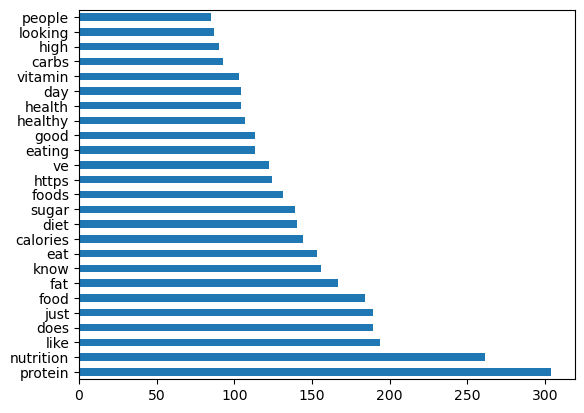

In [22]:
X_train_df2.sum().sort_values(ascending=False).head(25).plot(kind='barh');

# Fitness and Nutrition Combined

In [23]:
# combining the two dfs
combined_df = pd.concat([fitness, nutrition], axis=0)
combined_df.head()

,created_utc,title,subreddit,title_text,self_text
0,2023-10-19 09:00:43,"Daily Simple Questions Thread - October 19, 2023",Fitness,"Daily Simple Questions Thread - October 19, 20...",NaN
1,2023-10-18 09:00:22,Rant Wednesday,Fitness,Rant Wednesday-Welcome to Rant Wednesday: It’s...,NaN
2,2023-10-18 09:00:18,"Daily Simple Questions Thread - October 18, 2023",Fitness,"Daily Simple Questions Thread - October 18, 20...",NaN
3,2023-10-17 09:00:48,"Daily Simple Questions Thread - October 17, 2023",Fitness,"Daily Simple Questions Thread - October 17, 20...",NaN
4,2023-10-16 07:02:00,Moronic Monday - Your weekly stupid questions ...,Fitness,Moronic Monday - Your weekly stupid questions ...,NaN


In [24]:
combined_df.describe()

,created_utc,title,subreddit,title_text,self_text
count,1917,1917,1917,1917,950
unique,1867,1545,2,1612,930
top,2022-07-20 09:00:10,Physique Phriday,Fitness,Physique Phriday-**Welcome to the Physique Phr...,Welcome to the weekly [r/Nutrition](https://ww...
freq,3,66,967,66,14


### CountVectorizer

In [25]:
X = combined_df['title_text']
y = combined_df['subreddit']

In [26]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, random_state=42)

In [27]:
cvec3 = CountVectorizer(stop_words='english')

In [28]:
cvec3.fit(X_train3)

CountVectorizer(stop_words='english')

In [29]:
X_train3_transformed = cvec3.transform(X_train3)

In [30]:
X_test3_transformed = cvec3.transform(X_test3)

In [31]:
X_train_df3 = pd.DataFrame(X_train3_transformed.todense(), columns=cvec3.get_feature_names_out())

### Random Forest Classifier

In [32]:
#help for this classifier was used from https://git.generalassemb.ly/dsi-911/603-lesson-random-forest/blob/main/solution-code/rf-solutions.ipynb
rf = RandomForestClassifier(oob_score=True, max_features='sqrt')
rf.fit(X_train3_transformed, y_train3)

RandomForestClassifier(oob_score=True)

In [33]:
rf.score(X_train3_transformed, y_train3)

1.0

In [34]:
rf.score(X_test3_transformed, y_test3)

0.9479166666666666

In [35]:
rf.oob_score_

0.9561586638830898

In [36]:
pd.DataFrame({
    'features': cvec3.get_feature_names_out(),
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(15)

,features,importance
3570,fitness,0.039500
3993,gym,0.022333
8550,welcome,0.021839
7981,thread,0.018569
3323,exercise,0.015417
1322,ask,0.014089
3324,exercises,0.013771
7741,sure,0.013104
8588,wiki,0.012823
2245,com,0.012105


### Metrics

In [65]:
#baseline score
baselines = combined_df['subreddit'].value_counts(normalize=True)
baselines

Fitness      0.504434
nutrition    0.495566
Name: subreddit, dtype: float64

In [37]:
#predictions
y_pred = rf.predict(X_test3_transformed)

In [38]:
#precision
precision_fitness = precision_score(y_test3, y_pred, pos_label='Fitness')
precision_nutrition = precision_score(y_test3, y_pred, pos_label='nutrition')
precision_fitness, precision_nutrition

(1.0, 0.900398406374502)

In [39]:
#recall
recall_fitness = recall_score(y_test3, y_pred, pos_label='Fitness')
recall_nutrition = recall_score(y_test3, y_pred, pos_label='nutrition')
recall_fitness, recall_nutrition

(0.9015748031496063, 1.0)

In [40]:
#f1 score
f1_fitness = f1_score(y_test3, y_pred, pos_label='Fitness')
f1_nutrition = f1_score(y_test3, y_pred, pos_label='nutrition')
f1_fitness, f1_nutrition

(0.94824016563147, 0.9475890985324947)

In [41]:
#confusion matrix
confusion = confusion_matrix(y_test3, y_pred)
confusion

array([[229,  25],
       [  0, 226]], dtype=int64)

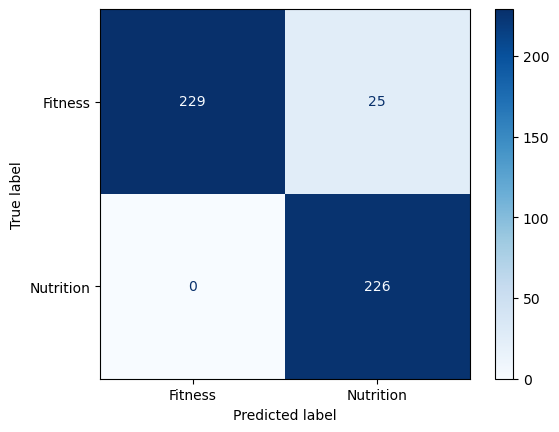

In [42]:
cm_rf = ConfusionMatrixDisplay(confusion, display_labels=['Fitness', 'Nutrition'])
cm_rf.plot(cmap='Blues')
plt.show()

### Logistic Regression

In [43]:
lr = LogisticRegression(penalty = 'l1', solver='liblinear')

lr.fit(X_train3_transformed, y_train3)

LogisticRegression(penalty='l1', solver='liblinear')

In [44]:
preds = lr.predict(X_test3_transformed)

In [45]:
lr.score(X_train3_transformed, y_train3)

0.9958246346555324

In [46]:
lr.score(X_test3_transformed, y_test3)

0.9625

### Metrics

In [47]:
#precision
precision_fitness_lr = precision_score(y_test3, preds, pos_label='Fitness')
precision_nutrition_lr = precision_score(y_test3, preds, pos_label='nutrition')
precision_fitness_lr, precision_nutrition_lr

(0.9916666666666667, 0.9333333333333333)

In [48]:
#recall
recall_fitness_lr = recall_score(y_test3, preds, pos_label='Fitness')
recall_nutrition_lr = recall_score(y_test3, preds, pos_label='nutrition')
recall_fitness_lr, recall_nutrition_lr

(0.937007874015748, 0.9911504424778761)

In [49]:
#f1 score
f1_fitness_lr = f1_score(y_test3, preds, pos_label='Fitness')
f1_nutrition_lr = f1_score(y_test3, preds, pos_label='nutrition')
f1_fitness_lr, f1_nutrition_lr

(0.9635627530364372, 0.9613733905579399)

In [50]:
#confusion matrix
confusion_lr = confusion_matrix(y_test3, preds)
confusion_lr

array([[238,  16],
       [  2, 224]], dtype=int64)

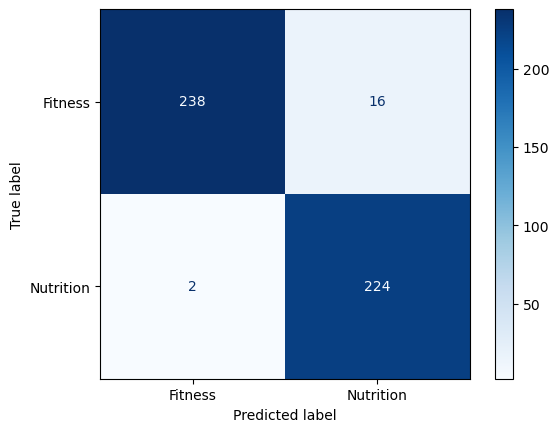

In [51]:
cm_lr = ConfusionMatrixDisplay(confusion_lr, display_labels=['Fitness', 'Nutrition'])
cm_lr.plot(cmap='Blues')
plt.show()

# Visualizations

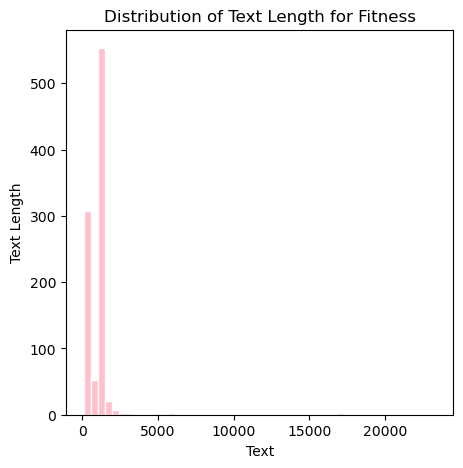

In [52]:
fitness['text_length'] = [len(length) for length in fitness['title_text']]
plt.figure(figsize=(5,5))
plt.hist(fitness['text_length'], bins=50, color='pink', edgecolor='white')
plt.title('Distribution of Text Length for Fitness')
plt.xlabel('Text')
plt.ylabel('Text Length')
plt.show()

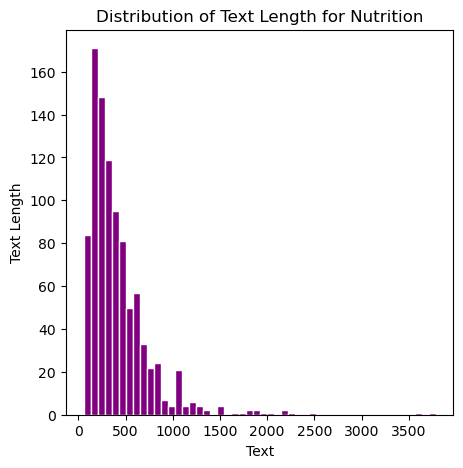

In [53]:
nutrition['text_length'] = [len(length) for length in nutrition['title_text']]
plt.figure(figsize=(5,5))
plt.hist(nutrition['text_length'], bins=50, color='purple', edgecolor='white')
plt.title('Distribution of Text Length for Nutrition')
plt.xlabel('Text')
plt.ylabel('Text Length')
plt.show()

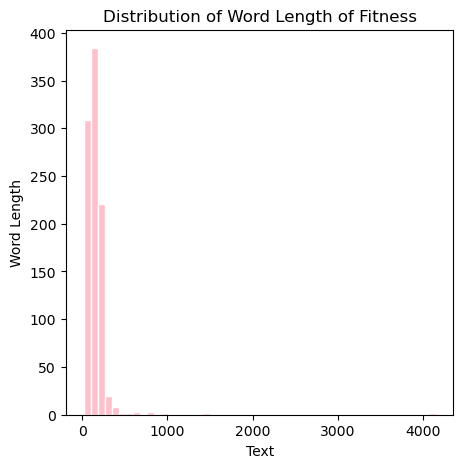

In [54]:
fitness['text_word_count'] = fitness['title_text'].str.count(' ') + 1

plt.figure(figsize=(5,5))
plt.hist(fitness['text_word_count'], bins=50, color='pink', edgecolor='white');
plt.title('Distribution of Word Length of Fitness')
plt.xlabel('Text')
plt.ylabel('Word Length')
plt.show()

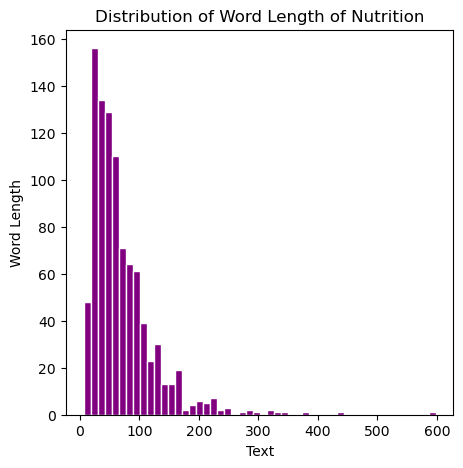

In [55]:
nutrition['text_word_count'] = nutrition['title_text'].str.count(' ') + 1

plt.figure(figsize=(5,5))
plt.hist(nutrition['text_word_count'], bins=50, color='purple', edgecolor='white');
plt.title('Distribution of Word Length of Nutrition')
plt.xlabel('Text')
plt.ylabel('Word Length')
plt.show()